# Advanced Numerical Analysis

## Exercise 21

$\textrm{(i)} \quad$ *Prove that each Gershgorin circle of a Hermitian matrix contains at least one
eigenvalue.*

Let $A \in \mathbb{C}^{n \times n}$ a Hermitian matrix and $C_k = \{z\in\mathbb{C}^n : |z - A_{kk}| \le \sum_{k \ne j=1}^n |A_{jk}|\}$ a Gershgorin circle of $A.$

By Corollary 1.7.9 for every $\tilde{\lambda} \in \mathbb{R}$ and $\tilde{x} \in \mathbb{C}^n \setminus \{0\}$ there exists an eigenvalue $\lambda$ of $A$ such that

$$|\lambda - \tilde{\lambda}| \le \frac{|\!|A \tilde{x} - \tilde{\lambda} \tilde{x}|\!|_2}{|\!|\tilde{x}|\!|_2}.$$

Since $A$ is Hermitian its diagonal has real entries and we can choose $\tilde{\lambda} = A_{kk}$ and $\tilde{x} = e_k.$ Then there exists an eigenvalue $\lambda$ of $A$ such that $|\lambda - A_{kk}| \le |\!|A_k - A_{kk} e_k|\!|_2 \le |\!|A_k - A_{kk} e_k|\!|_1 = \sum_{k \ne j=1}^n |A_{jk}|$ and therefore $\lambda$ lies within the Gershgorin circle $C_k.$ This holds for all $k = 1, \dots, n$ and therefore every Gershgorin circle contains at least one eigenvalue.

The following plots the Gershgorin circles and eigenvalues of a random Hermitian matrix.

In [1]:
function plot_Gershgorin(A)
    % plots Gershgorin circles and eigenvalues of an n x n matrix A in the complex plane
    
    hold on
    
    % plotting eigenvalues
    eigenvalues = eig(A);
    scatter(real(eigenvalues), imag(eigenvalues), "linewidth", 25);
    
    % plotting Gershgoring circles
    centers = diag(A);
    radii = sum(abs(A), dim=2) - abs(centers);
    t = linspace(0, 2*pi, 100);
    for i=1:length(A)
        circle_x = radii(i) .* cos(t) + real(centers(i));
        circle_y = radii(i) .* sin(t) + imag(centers(i));
        plot(circle_x, circle_y, "linewidth", 5);
    endfor
    
    title("Gershgorin circles and eigenvalues");
    xlabel("Real axis");
    ylabel("Imaginary axis");
    
endfunction

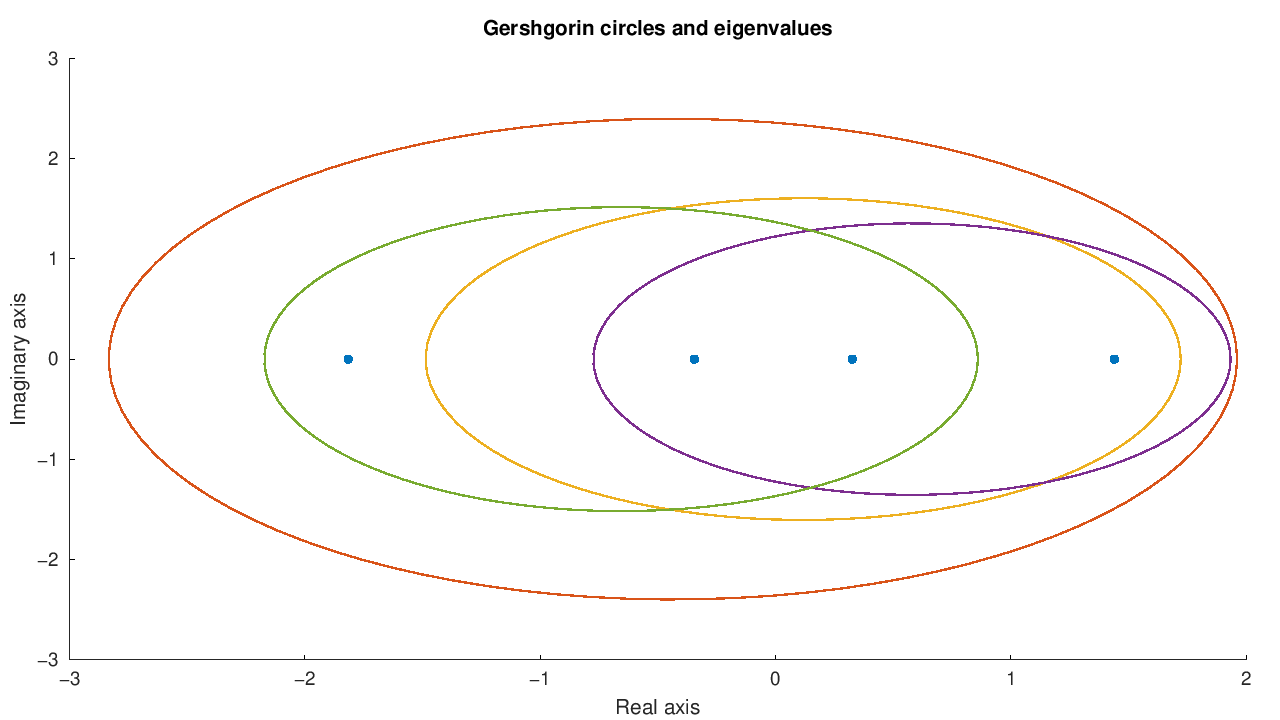

In [6]:
%plot -s 1280,720
n = 4;
A = 2 * rand(n) - 1;
B = 2 * rand(n) - 1;
H = ((A + i*B) + (A + i*B)') / 2; % random Hermitian matrix
plot_Gershgorin(H)

$\textrm{(ii)} \quad$ *Find an example of a* $3 \times 3$ *complex symmetric matrix for which some Gershgorin
circle contains no eigenvalue.*

Such a matrix was found using the brute force algorithm below which checks random integer matrices for empty Gershgorin circles.

In [18]:
function found = brute_force(dimension, limit, max_iterations=10000)
    range = [-limit, limit];
    
    for _ = 1 : max_iterations
        A = randi(range, dimension);
        B = randi(range, dimension);
        S = ((A + i*B) + transpose(A + i*B)) / 2; % random symmetric matrix
        
        eigenvalues = eig(S);
        centers = diag(S);
        radii = sum(abs(S), dim=2) - abs(centers);

        for k = 1 : dimension
            if all(abs(eigenvalues - centers(k)) > radii(k))
                found = S;
                return
            endif
        endfor
    endfor
    
    printf("No suitable matrix was found in %d iterations.", max_iterations)
endfunction

S =

   1.0000 + 1.0000i   1.0000 - 0.5000i   1.0000 +      0i
   1.0000 - 0.5000i  -1.0000 - 1.0000i        0 +      0i
   1.0000 +      0i        0 +      0i   1.0000 +      0i



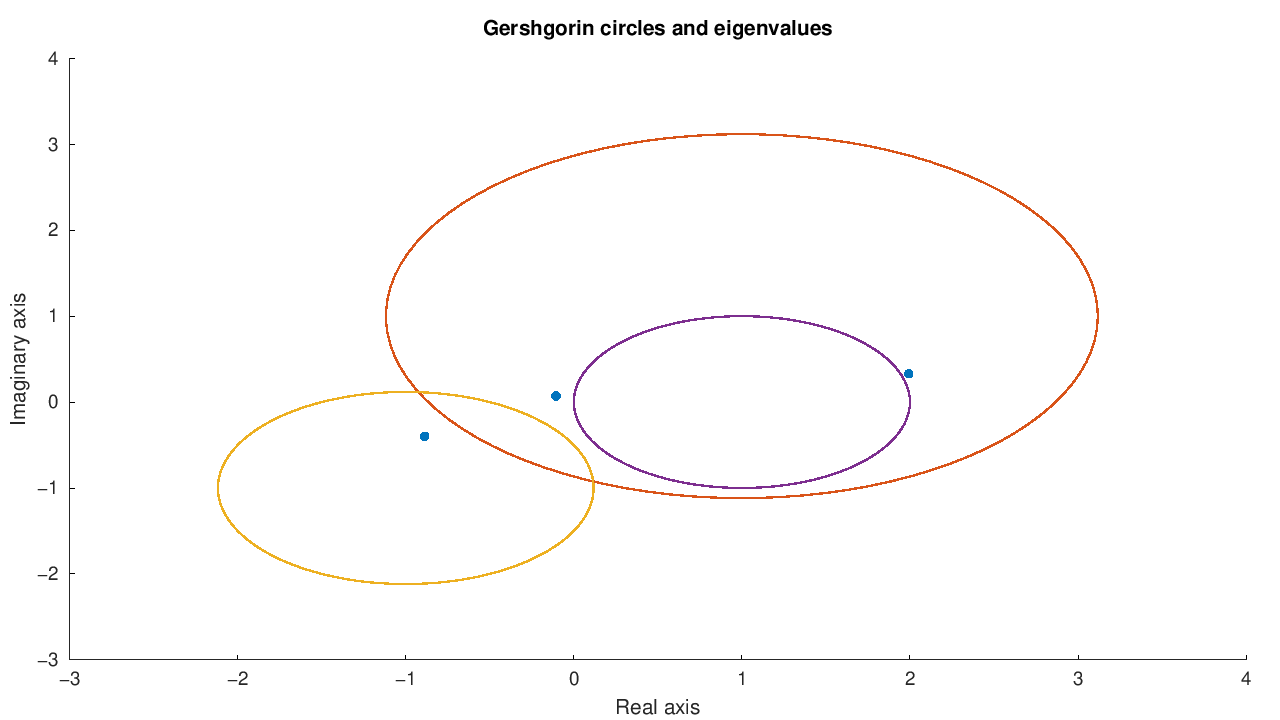

In [19]:
%plot -s 1280,720
S = brute_force(3, 1, 10000)
plot_Gershgorin(S)